### Experimenting with 𝛽0 and 𝛽1 in Logistic Function

This activity focuses on changing the $\beta_0$ and $\beta_1$ parameters within the logistic function.  



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression

### The Data

For this activity we revisit the credit data and examine only the balance feature to classifiy 

In [2]:
credit = pd.read_csv('data/default.csv')

In [3]:
credit.head()

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


In [4]:
y = np.where(credit['default'] == 'Yes', 1, 0)

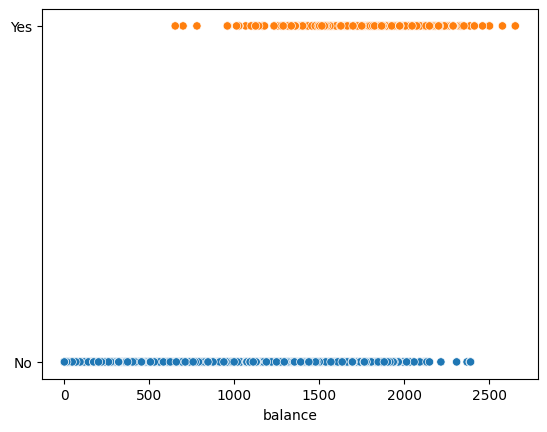

In [5]:
sns.scatterplot(data = credit, x = 'balance', y = y, hue = 'default', legend = False)
plt.yticks([0, 1], ['No', 'Yes']);

Implements sigma function with linear parameters beta_0 and beta_1.


$$\Sigma(x, \beta_0, \beta_1) = \frac{1}{1 + e^{-(\beta_0 + \beta_1x})}$$



In [6]:
def sigma(x, beta_0, beta_1):
    sigma_value = 1/(np.add(1, np.exp(-(beta_0 + np.multiply(beta_1, x)))))
    return sigma_value

sigma(np.array([-1, 0, 1]), 1, 1)

array([0.5       , 0.73105858, 0.88079708])


### Varying $\beta_0$


In [7]:

beta_1= 0.01
x= 0

beta_0 = 5
y1 = beta_0 + beta_1 * x 

beta_0 = 10
y2 = beta_0 + beta_1 * x 

beta_0 = 15
y3 = beta_0 + beta_1 * x 

print (y1, y2, y3)

5.0 10.0 15.0


#### Intercept and the coefficient for this  model

In [8]:
# credit['balance']
clf = LogisticRegression().fit(credit[['balance']], y)
print (clf.coef_)
clf.intercept_, clf.coef_

[[0.00549892]]


(array([-10.65132824]), array([[0.00549892]]))

[[0.00549892]]


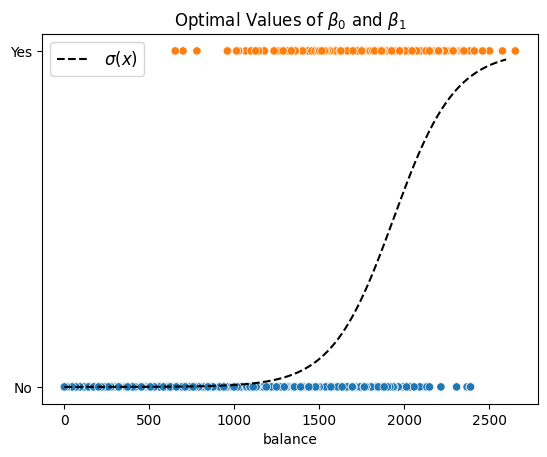

In [9]:
beta_0 = ''
beta_1 = ''

clf = LogisticRegression().fit(credit[['balance']], y)
print (clf.coef_)
beta_0 = clf.intercept_[0]
beta_1 = clf.coef_[0, 0]


sns.scatterplot(data = credit, x = 'balance', y = y, hue = 'default', legend = False)
plt.yticks([0, 1], ['No', 'Yes'])
x = np.linspace(0,2600, 1000)
plt.plot(x, sigma(x, beta_0, beta_1), '--', color = 'black', label = r'$\sigma(x)$')
plt.legend(fontsize = 12)
plt.title(r'Optimal Values of $\beta_0$ and $\beta_1$');